# BUILDING REGRESSION MODEL

## Download the dataset and Import necessary libraries

In [108]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [20]:
d=pd.read_csv("C:\\Users\\JP\\Downloads\\abalone.csv")
d

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [21]:
d.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
d.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


## TO ADD "AGE" COLUMN USING RINGS DATA ADD '1.5' TO THE RING DATA

In [23]:
d['age'] = d['Rings']+1.5
d.drop('Rings', axis = 1, inplace = True)
d

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [24]:
d.shape

(4177, 9)

In [75]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


# PERFORM VISUALIZATIONS
## UNIVARIATE ANALYSIS

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

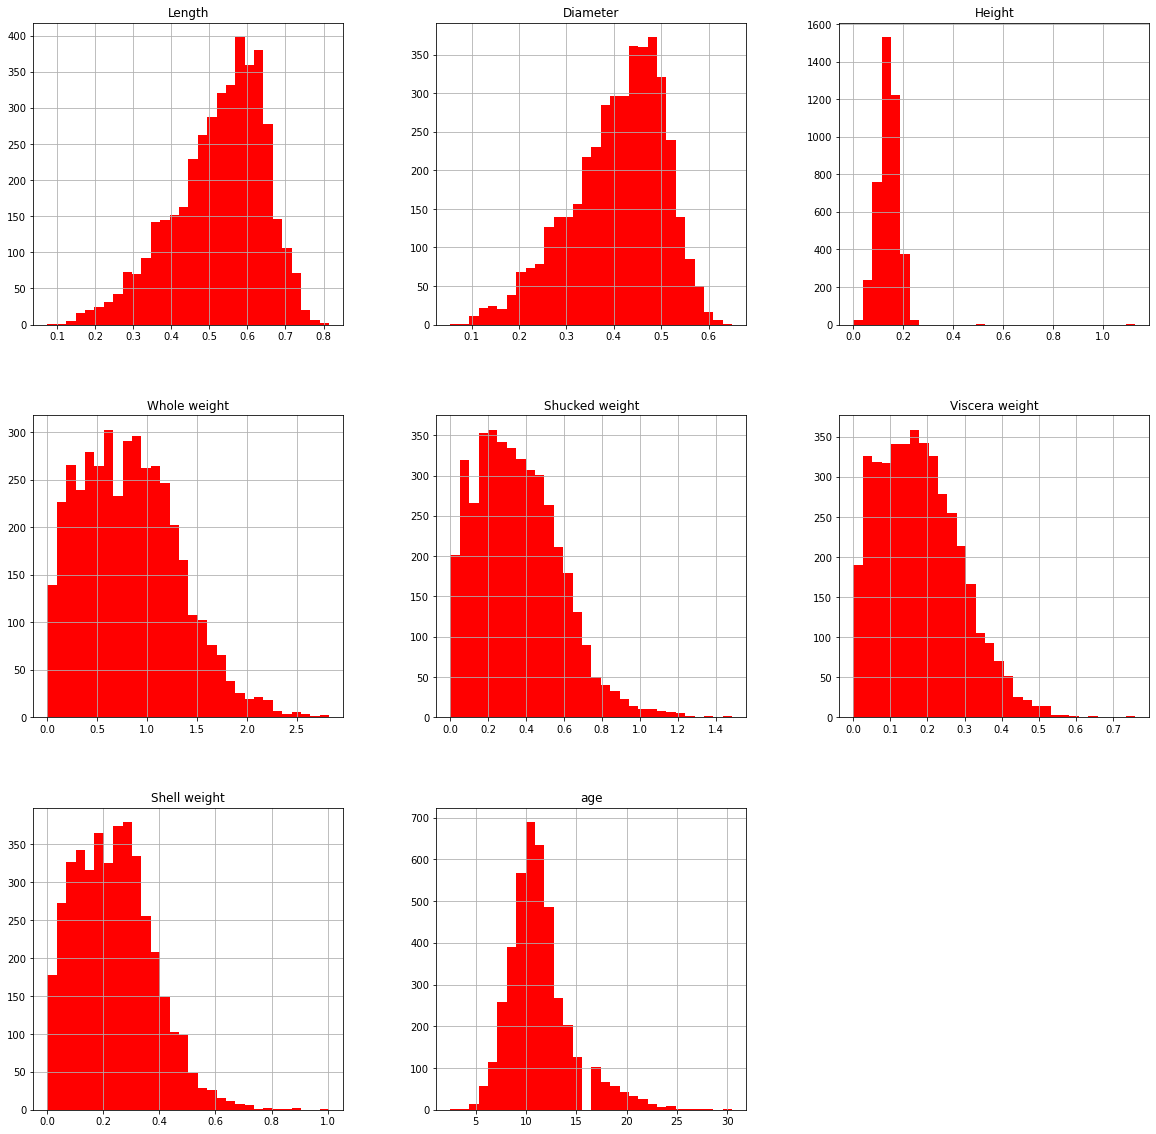

In [27]:


d.hist(figsize=(20,20), grid=True, layout=(3, 3), bins = 30,color="red")

In [28]:
numerical_features = d.select_dtypes(include=[np.number]).columns
categorical_features = d.select_dtypes(include=[np.object]).columns

C:\Users\JP\AppData\Local\Temp\ipykernel_8344\2422027508.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = d.select_dtypes(include=[np.object]).columns


In [29]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [18]:
categorical_features

Index(['Sex'], dtype='object')

<AxesSubplot:xlabel='Sex', ylabel='count'>

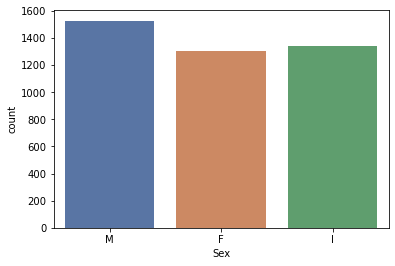

In [31]:
sns.countplot(x = 'Sex', data = d, palette="deep")

C:\Users\JP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\JP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age', ylabel='Sex'>

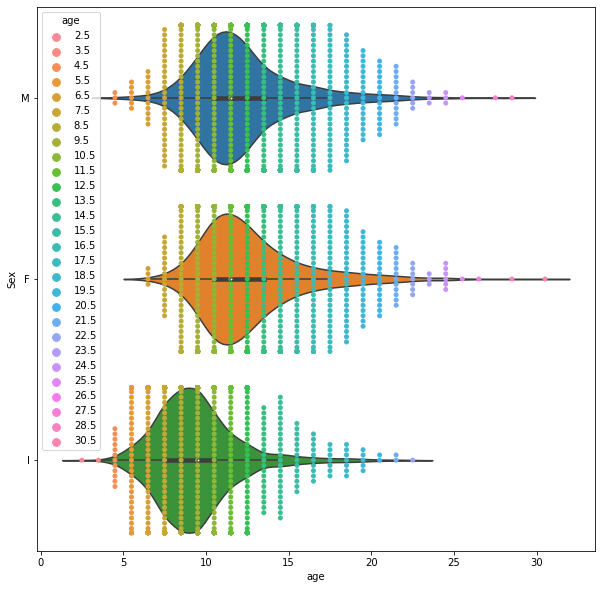

In [38]:
plt.figure(figsize = (10,10))
sns.swarmplot(x = d['age'], y = d['Sex'], data = d, hue = 'age')
sns.violinplot(x = d['age'], y = d['Sex'], data = d)

In [39]:
d.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


([<matplotlib.patches.Wedge at 0x739fbc30a0>,
 [Text(0.45010440780275796, 1.0036961801643607, ''),
  Text(-1.0848393519507589, -0.18199884741134378, ''),
  Text(0.6099659291018239, -0.9153914820091724, '')],
 [Text(0.24551149516514065, 0.5474706437260148, '36.6%'),
  Text(-0.5917305556095048, -0.09927209858800569, '32.1%'),
  Text(0.3327086886009948, -0.49930444473227575, '31.3%')])

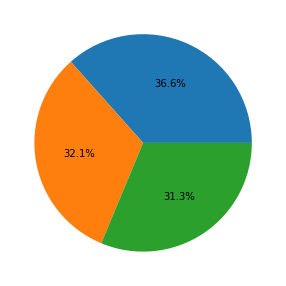

In [40]:
plt.subplots(figsize=(5,5))
plt.pie(d['Sex'].value_counts(),autopct="%1.1f%%")

C:\Users\JP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

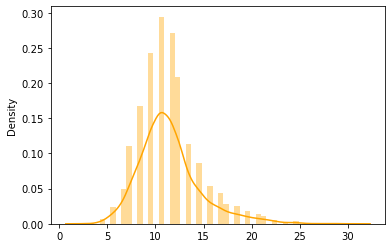

In [57]:
sns.distplot(x=d["age"],color="orange")

<AxesSubplot:xlabel='age'>

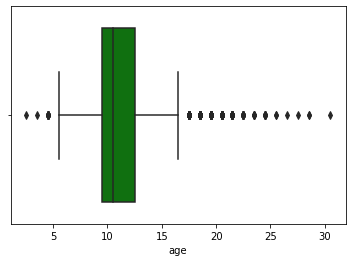

In [58]:
sns.boxplot(x=d["age"],color="green")

## BIVARIATE ANALYSIS

<AxesSubplot:xlabel='age', ylabel='Height'>

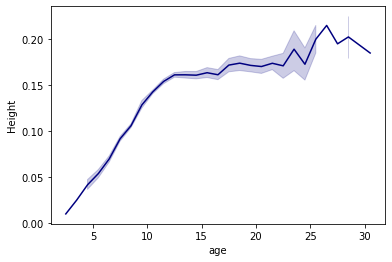

In [60]:
sns.lineplot(x=d['age'],y=d['Height'],color="navy")

<AxesSubplot:xlabel='Sex', ylabel='Height'>

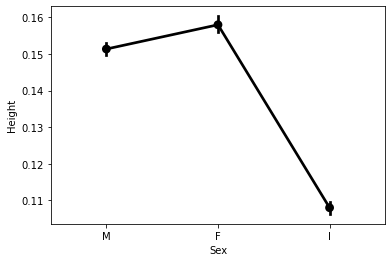

In [61]:
sns.pointplot(x=d["Sex"],y=d["Height"],color="black")

<AxesSubplot:xlabel='age', ylabel='Height'>

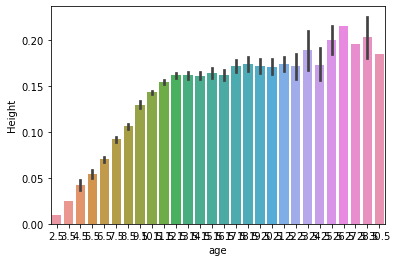

In [63]:
sns.barplot(x=d["age"],y=d["Height"])

## MULTIVARIATE ANALYSIS

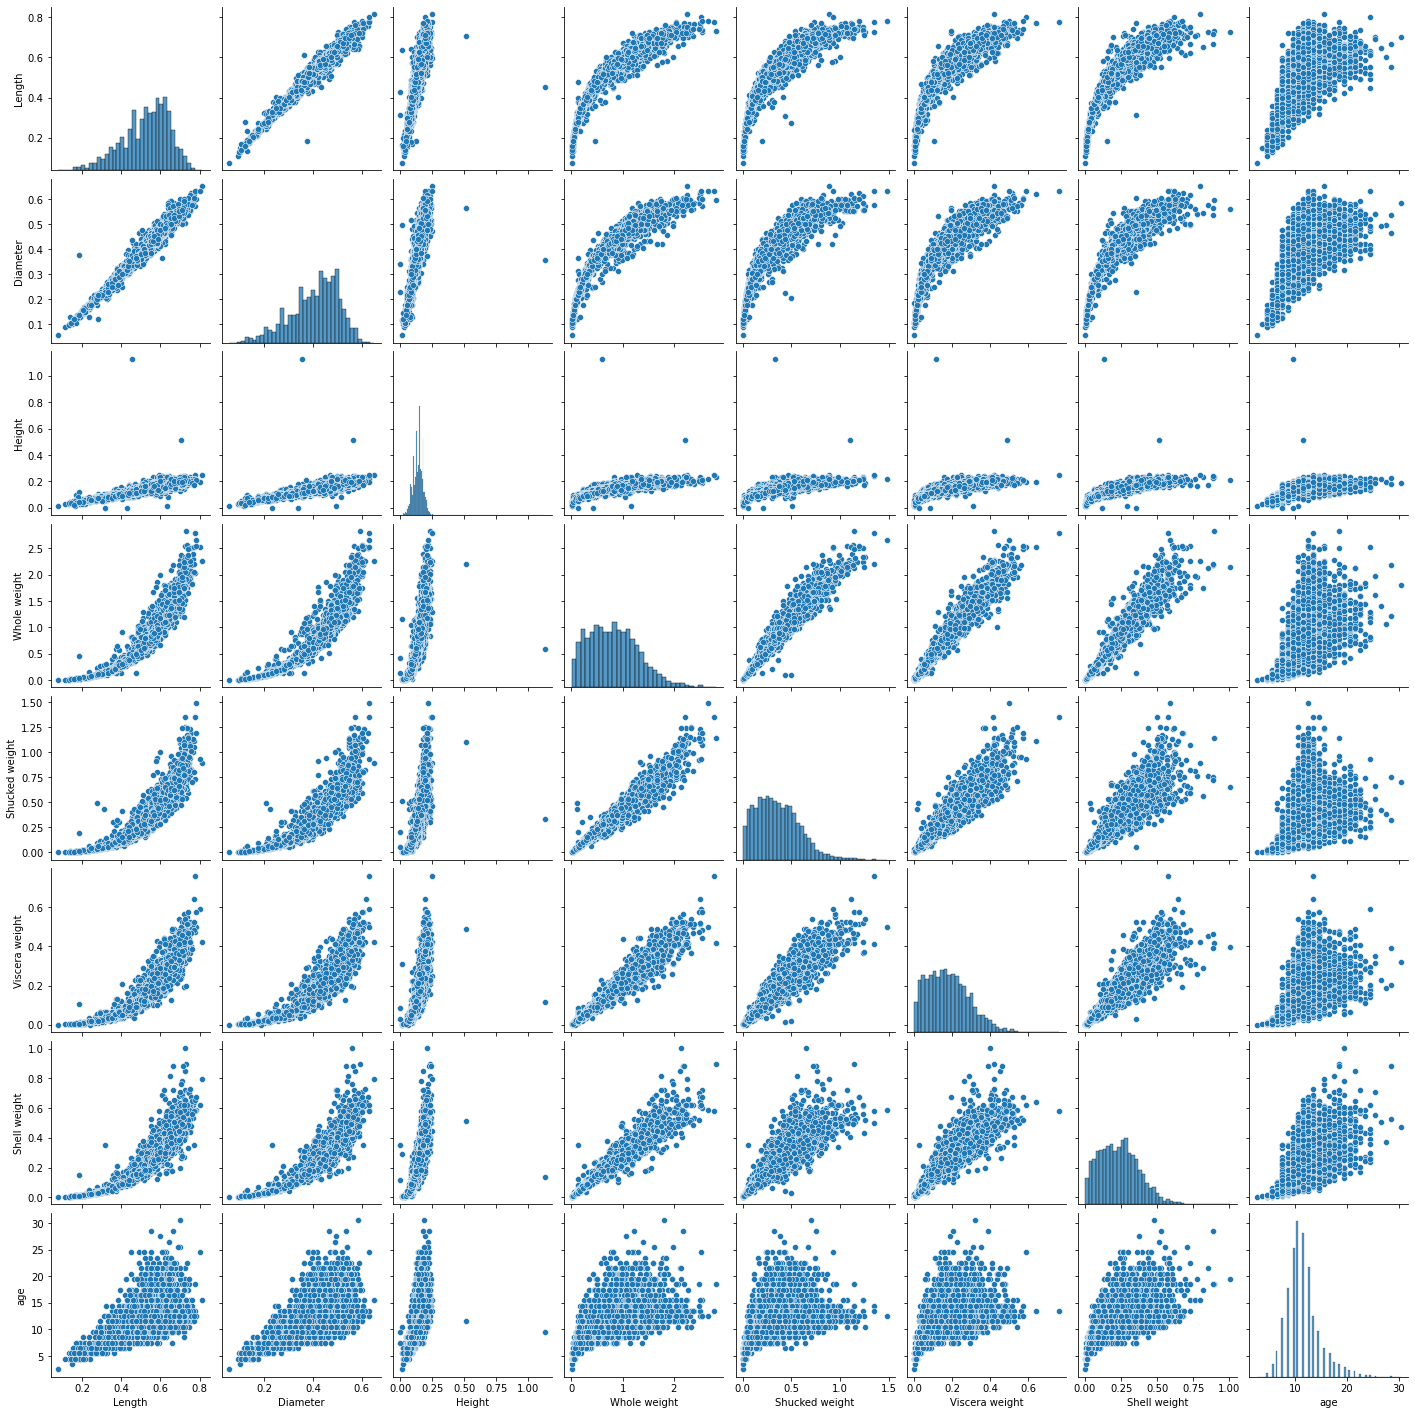

In [65]:
sns.pairplot(d[numerical_features])

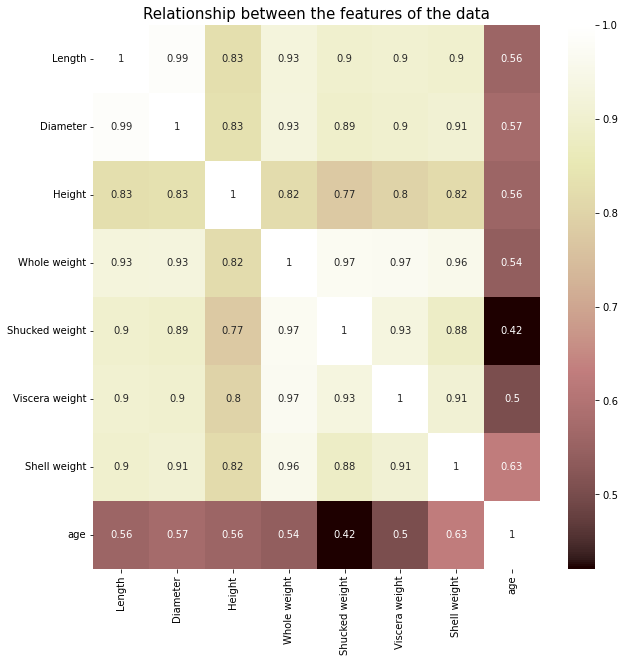

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(d.corr(),cmap=plt.cm.pink,annot=True)
plt.title('Relationship between the features of the data',
         fontsize=15)
plt.show()

## Perform descriptive statistics on the dataset.

In [72]:
d.mean()

C:\Users\JP\AppData\Local\Temp\ipykernel_8344\1214089992.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d.mean()


Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
age               11.433684
dtype: float64

In [74]:
d.std()

C:\Users\JP\AppData\Local\Temp\ipykernel_8344\4080983771.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d.std()


Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
age               3.224169
dtype: float64

In [76]:
d.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


## Check for Missing values and deal with them.

In [77]:
d.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [78]:
d.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

##  Find the outliers and replace them outliers

<AxesSubplot:>

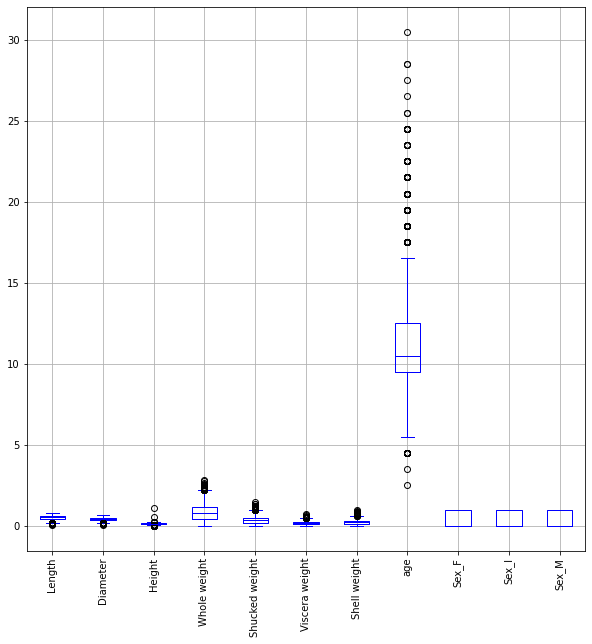

In [80]:
data = pd.get_dummies(d)
dummy_data = data.copy()
data.boxplot( rot = 90, figsize=(10,10),color="blue")

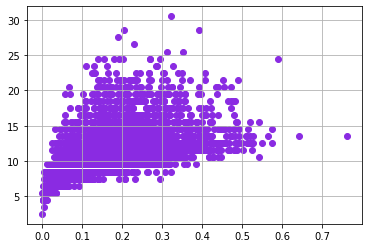

In [81]:
var = 'Viscera weight'
plt.scatter(x = data[var], y = data['age'],color="blueviolet")
plt.grid(True)

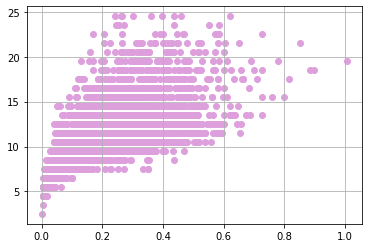

In [82]:
data.drop(data[(data['Viscera weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera weight']<0.5) & (data['age'] > 25)].index, inplace=True)
var = 'Shell weight'
plt.scatter(x = data[var], y = data['age'],color="plum")
plt.grid(True)

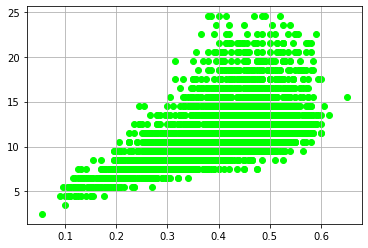

In [83]:
data.drop(data[(data['Whole weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Whole weight']<2.5) & (data['age'] > 25)].index, inplace=True)
var = 'Diameter'
plt.scatter(x = data[var], y = data['age'],color="lime")
plt.grid(True)

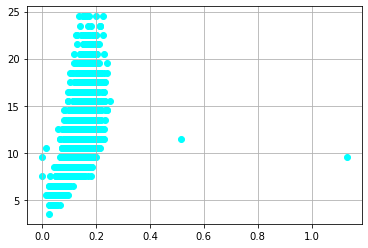

In [85]:
data.drop(data[(data['Diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Diameter']>=0.6) & (data['age']< 25)].index, inplace=True)
var = 'Height'
plt.scatter(x = data[var], y = data['age'],color="aqua")
plt.grid(True)

## Check for Categorical columns and perform encoding.

In [86]:
d.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
age               float64
dtype: object

In [88]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
d['Sex']= label_encoder.fit_transform(d['Sex'])
  
d['Sex'].unique()
d.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Split the data into dependent and independent variables.

## Independent variable

In [89]:
X= d.drop(['age'], axis = 1)
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


## DEPENDENT VARIABLE

In [96]:
Y=d.age
Y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

## Scale the independent variables

In [111]:
from sklearn.preprocessing import scale
scale(X)

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

## Split the data into training and testing

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
standardScale = StandardScaler()
X=standardScale.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
x_train.shape

(3132, 8)

In [114]:
y_train.shape

(3132,)

In [115]:
x_test.shape

(1045, 8)

In [116]:
y_test.shape

(1045,)

##  Build the Model

## LINEAR REGRESSION MODEL

In [117]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

## Train the Model

In [118]:
reg_model.score(x_train, y_train)

0.540879125014839

## Test the model

In [119]:
reg_model.score(x_test, y_test)

0.4399127347670204

In [120]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(x_train)
X_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)
print(poly_clf.score(X_train2, y_train))

0.5712731059759911


In [121]:
poly_clf.score(X_test2, y_test)

0.5265203341829705

##  DECISION TREE REGRESSOR

In [122]:
from sklearn.tree import DecisionTreeRegressor
dTree = DecisionTreeRegressor(random_state = 0,max_depth=7,min_samples_leaf=6)
dTree.fit(x_train, y_train)
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.6470680336545231
0.43789030957491093


## RANDOM FOREST REGRESSOR

In [125]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)

regressor.fit(x_train, y_train)
regressor.score(x_train,y_train)*100

93.74801114887077

In [126]:
regressor.fit(x_test, y_test)
regressor.score(x_test,y_test)*100

93.05826691316292

## SUPPORT VECTOR REGRESSOR

In [127]:
from sklearn.svm import SVR
regressor1 = SVR(kernel = 'rbf')
regressor1.fit(x_train, y_train)
regressor1.score(x_train,y_train)*100

55.81102294245595

In [128]:
regressor1.fit(x_test, y_test)
regressor1.score(x_test,y_test)*100

49.791675027821306

## Metrics

In [129]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test,y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 1.53
Mean squared error = 4.55
Median absolute error = 1.15
Explain variance score = 0.53
R2 score = 0.53


## Random Forest Model is the best model since it is the generalized one when compared with other models.